In [1]:
import numpy as np
from scipy import optimize, stats
import math
import random
import matplotlib.pyplot as plt

# STDP

In [70]:
Spre = np.zeros([500])
Spost = np.zeros([500])
wl = np.zeros([500])
ws = np.zeros([500])
w_mstdp = np.zeros([500])
w_stdp=np.zeros([500])
trace_pre= np.zeros([500])
trace_post= np.zeros([500])
elig= np.zeros([500])
da= np.zeros([500])
delta= np.zeros([500])

In [71]:
Spre[[100,300]] = 1
Spost[[110, 305]] = 1
trace_decay = 0.95
weight_decay_s = 0.95
weight_decay_l = 0.999999
elig_decay = 0.95
da_decay = 0.9

In [72]:
for i in range(499):
    
    i+=1
    da[i] = da[i-1]*da_decay
    if i==320:
        da[i]=1
    
    trace_pre[i] = trace_pre[i-1]*trace_decay + Spre[i]
    trace_post[i] = trace_post[i-1]*trace_decay + Spost[i]
    if Spre[i]:
        delta[i] -= trace_post[i]
    if Spost[i]:
        delta[i] += trace_pre[i]
        
    
    w_stdp[i] = w_stdp[i-1]+ 0.3*delta[i]   
    elig[i]=elig[i-1]*elig_decay + delta[i]
    
    ws[i]=ws[i-1]*weight_decay_s + delta[i]
    transfer = ws[i] * da[i] * 1e-1
    wl[i]=wl[i-1]*weight_decay_l + transfer
    ws[i]-= transfer
    
    w_mstdp[i] = w_mstdp[i-1] + (da[i]==1)*elig[i]*0.7
        

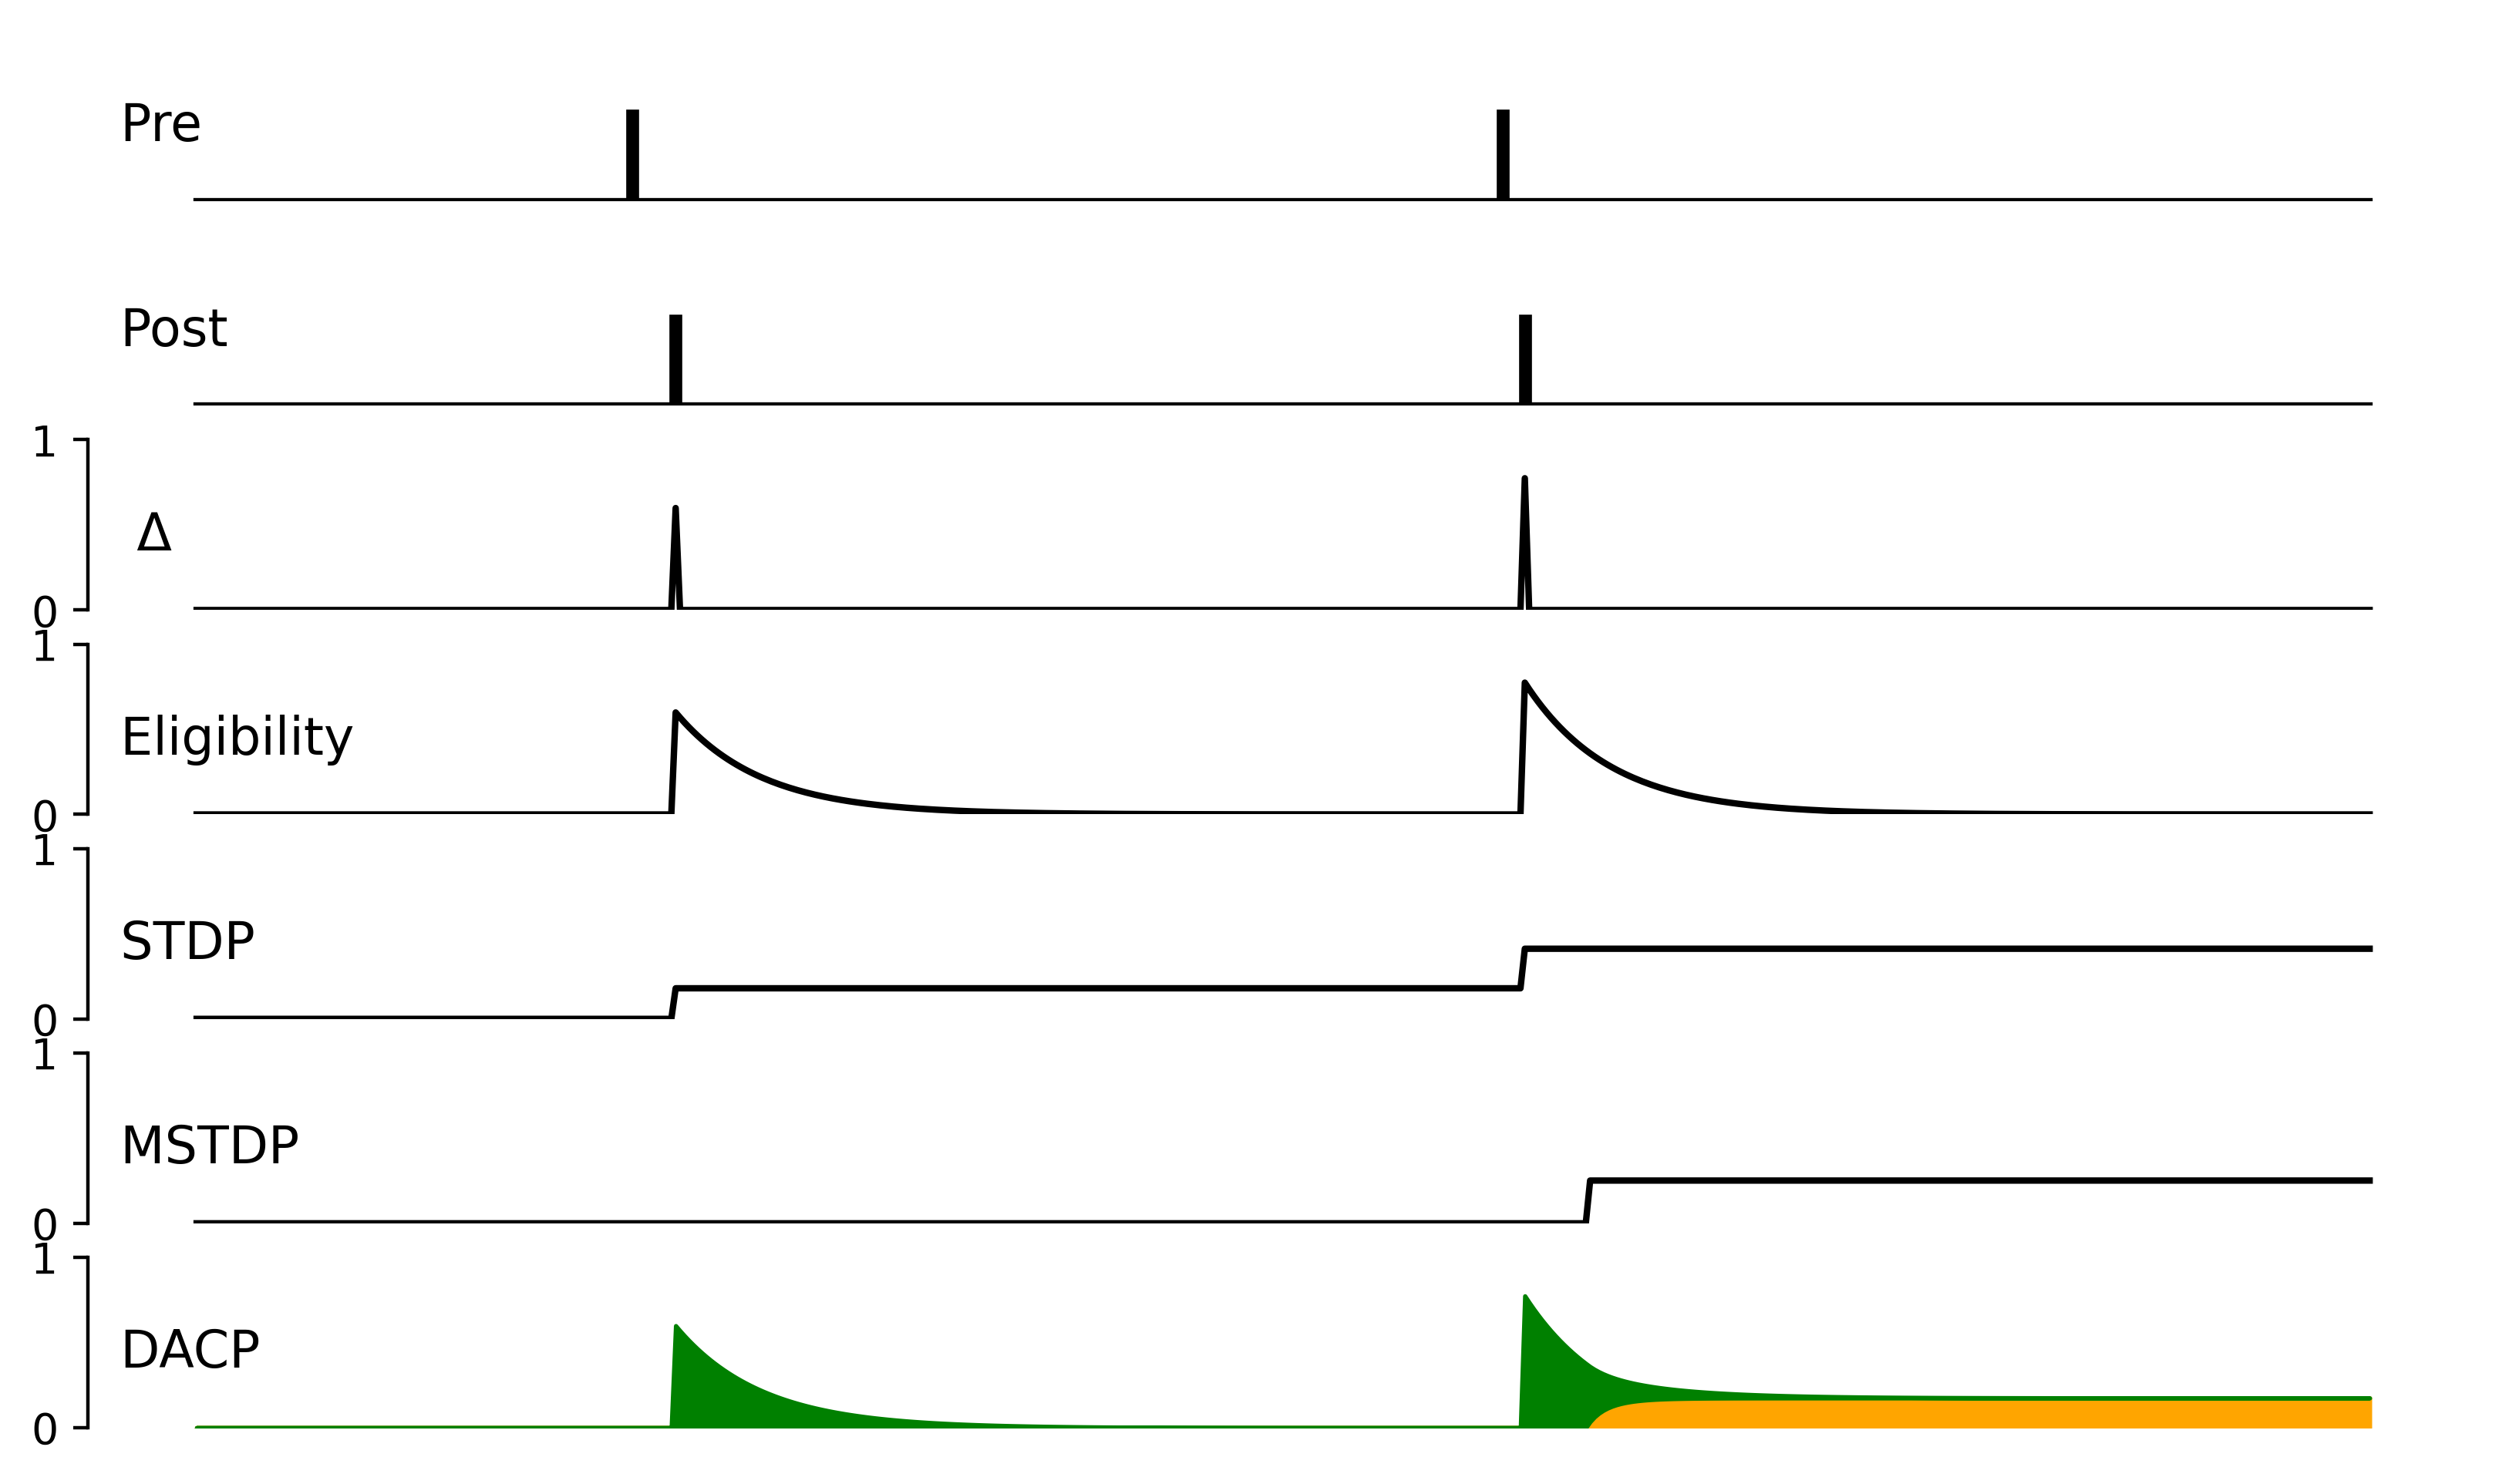

In [73]:
fig, ax = plt.subplots(nrows=7,  sharex=True)
fig.set_figwidth(10)
fig.set_figheight(6)
fig.set_dpi(400)
x = np.arange(0,500)

ax[0].plot(x, np.zeros([500]), 'black')
ax[0].axvline(x=100, ymin=0, ymax=.5, color='black', lw=3)
ax[0].axvline(x=300, ymin=0, ymax=.5, color='black', lw=3)
ax[0].set(ylim=(0, 1))
ax[0].set_yticks([])
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].set_title('  Pre', loc='left', y = 0.2)

ax[1].plot(x, np.zeros([500]), 'black')
ax[1].axvline(x=110, ymin=0, ymax=.5, color='black', lw=3)
ax[1].axvline(x=305, ymin=0, ymax=.5, color='black', lw=3)
ax[1].set(ylim=(0, 1))
ax[1].set_yticks([])
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].set_title('  Post', loc='left', y = 0.2)

ax[2].plot(x, delta, 'black')
ax[2].axvline(x=110, ymin=0, ymax=delta[104], color='black', lw=3)
ax[2].axvline(x=305, ymin=0, ymax=delta[310], color='black', lw=3)
ax[2].set(ylim=(0, 1))
ax[2].set_yticks([0.0,1.0])
ax[2].spines['left'].set_visible(True)
ax[2].spines['top'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].set_title('   \u0394', loc='left', y = 0.2)

ax[3].plot(x, elig, 'black')
ax[3].set(ylim=(0, 1))
#ax[3].yticks(False)
ax[3].set_yticks([0.0,1.0])
ax[3].spines['top'].set_visible(False)
ax[3].spines['bottom'].set_visible(False)
ax[3].spines['right'].set_visible(False)
ax[3].set_title('  Eligibility', loc='left', y = 0.2)

ax[4].plot(x, w_stdp, 'black')
ax[4].set(ylim=(0, 1))
ax[4].set_yticks([0.0,1.0])
ax[4].set_xticks([])
ax[4].spines['top'].set_visible(False)
ax[4].spines['bottom'].set_visible(False)
ax[4].spines['right'].set_visible(False)
ax[4].set_title('  STDP', loc='left', y = 0.2)

ax[5].plot(x, w_mstdp, 'black')
ax[5].set(ylim=(0, 1))
ax[5].set_yticks([0.0,1.0])
ax[5].set_xticks([])
ax[5].spines['top'].set_visible(False)
ax[5].spines['bottom'].set_visible(False)
ax[5].spines['right'].set_visible(False)
ax[5].set_title('  MSTDP', loc='left', y = 0.2)

#ax[5].plot(x, wl, label = "Wl",color= 'orange')
#ax[5].plot(x, wl+ws, label = "W",color= 'g')
ax[6].set(ylim=(0, 1))
ax[6].set_yticks([0.0,1.0])
ax[6].spines['top'].set_visible(False)
ax[6].spines['bottom'].set_visible(False)
ax[6].spines['right'].set_visible(False)
ax[6].fill_between(x, wl, color = 'orange')
ax[6].fill_between(x, wl, wl+ws, color = 'g')
ax[6].set_title('  DACP', loc='left', y = 0.2)
plt.savefig('stdp.png')
plt.show()

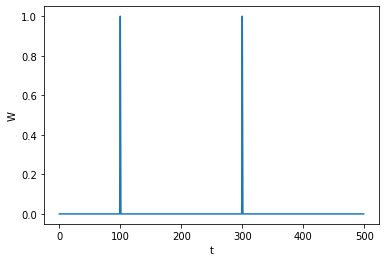

In [8]:
plt.plot(range(500), Spre, label = "W")
plt.xlabel('t')
plt.ylabel('W')
#plt.savefig('taskb1.png')
plt.show()

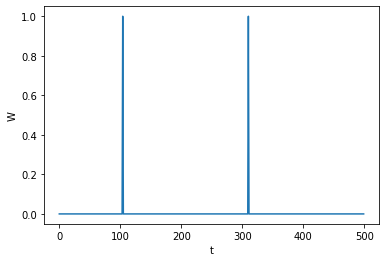

In [9]:
plt.plot(range(500), Spost, label = "W")
plt.xlabel('t')
plt.ylabel('W')
#plt.savefig('taskb1.png')
plt.show()

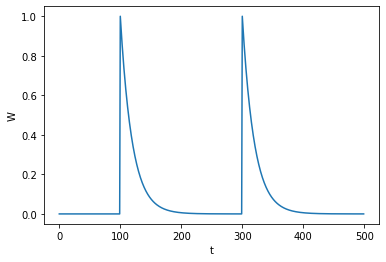

In [10]:
plt.plot(range(500), trace_pre, label = "W")
plt.xlabel('t')
plt.ylabel('W')
#plt.savefig('taskb1.png')
plt.show()

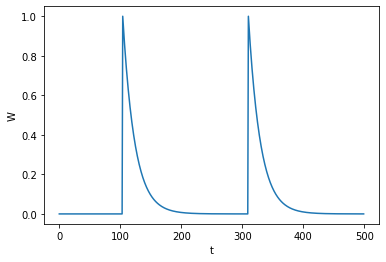

In [11]:
plt.plot(range(500), trace_post, label = "W")
plt.xlabel('t')
plt.ylabel('W')
#plt.savefig('taskb1.png')
plt.show()

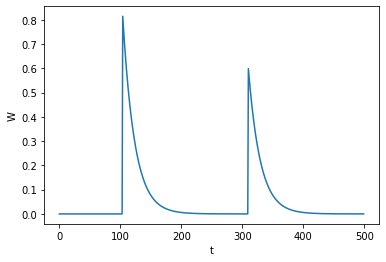

In [12]:
plt.plot(range(500), elig, label = "W")
plt.xlabel('t')
plt.ylabel('W')
#plt.savefig('taskb1.png')
plt.show()

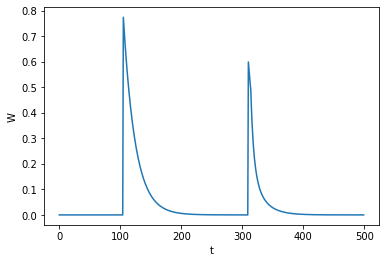

In [56]:
plt.plot(range(500),ws, label = "W")
plt.xlabel('t')
plt.ylabel('W')
#plt.savefig('taskb1.png')
plt.show()

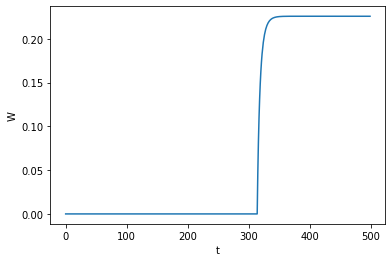

In [57]:
plt.plot(range(500), wl, label = "W")
plt.xlabel('t')
plt.ylabel('W')
#plt.savefig('taskb1.png')
plt.show()

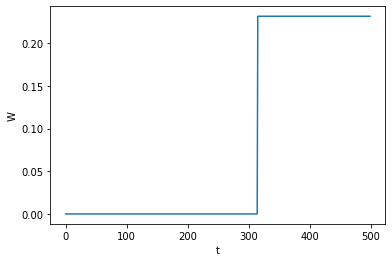

In [58]:
plt.plot(range(500), w_mstdp, label = "W")
plt.xlabel('t')
plt.ylabel('W')
#plt.savefig('taskb1.png')
plt.show()

# MNIST

In [18]:
import pandas
df = pandas.read_csv('./submission.csv')

In [4]:
df

,Label,Predictions,Spikes
0,2,7,5
1,9,9,9
2,8,8,4
3,9,9,6
4,0,0,8
...,...,...,...
9995,7,7,9
9996,7,7,2
9997,2,2,7
9998,8,8,4


In [6]:
acc = sum(df['Label']==df['Predictions'])/10000

In [22]:
df['Spikes'].mean()

5.7506

In [179]:
fr = np.zeros(10)
for i in range(10):
    fr[i] = df['Spikes'][df['Predictions']==i].mean()
    

In [180]:
fr

array([6.54462475, 4.90574122, 6.28310011, 5.56977863, 5.90486726,
       6.05889145, 6.28467153, 5.75396825, 5.42695473, 5.21856028])

In [19]:
confusion = np.zeros([10,10],dtype=int)
for i in range(10000):
    confusion[df['Label'][i], df['Predictions'][i]] += 1

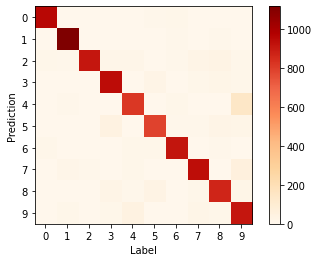

In [20]:
ind = np.arange(0, 10, dtype = int)
plt.yticks(ind, ind)
plt.xticks(ind, ind)
plt.imshow(confusion, cmap = 'OrRd')
plt.colorbar()
#plt.title("hotmap")
plt.xlabel('Label')
plt.ylabel('Prediction')
plt.savefig('confusion.png')
plt.show()

In [12]:
ckp = np.loadtxt('w.txt')

In [34]:
ckp[0,0]

1.189503788948059

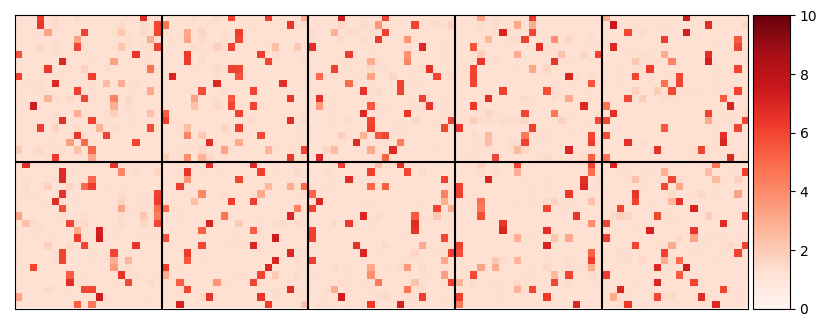

In [40]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
f = plt.figure()
f.set_figwidth(10)
f.set_dpi(100)
ax = plt.gca()
plt.yticks([])
plt.xticks([])

plt.axvline(x=19.5,color='black')
plt.axvline(x=39.5,color='black')
plt.axvline(x=59.5,color='black')
plt.axvline(x=79.5,color='black')
plt.axhline(y=19.5,color='black')

plt.imshow(ckp.reshape([40, 100]), cmap = 'Reds', vmin=0, vmax=10)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(cax = cax)
plt.savefig('weights.png')
plt.show()

# forgetting curve

In [2]:
class EngramNeuron():
    def __init__(self, tau, V0, Vrest, dt=1):
        self.tau = tau
        self.V0 =V0
        self.Vrest = Vrest
        self.dt = dt
        self.V = Vrest
    
    def LIF(self, weights, fr, uE):
        deltaV = self.dt/self.tau * (-(self.V-self.Vrest)+ (weights*fr).sum() + uE)
        self.V += deltaV
        #print(deltaV)
        return self.Phi()
    
    def Phi(self):
        if self.V-self.V0 <= 0:
            return 0
        else:
            return 1*(self.V-self.V0)**0.2   

In [3]:
def simulation(n_neuron, decay_s, decay_l, lr, decay_da, T, para):
    V0, Vrest, mu_in0, sig_in0, mu_N0, sig_N0, mu_in1, sig_in1, mu_N1, sig_N1 = para
    syn = Synapse(n_neuron, decay_s, decay_l, lr, V0, Vrest)    
    for j in range(0, len(T), 2):
        da = syn.DA()
        for i in range(T[j]):
            syn.learn(mu_in0, sig_in0, mu_N0, sig_N0)
            syn.decay_consolidate(da)
            da *= decay_da
        
        #learning interval
        DA = np.random.binomial(1, 3e-3, T[j+1]) * np.random.normal(3, 1, T[j+1]).clip(0,10)
        for i in range(T[j+1]):
            da = DA[i]
            syn.nolearn(mu_in1, sig_in1, mu_N1, sig_N1)
            syn.decay_consolidate(da)
            
    syn.w_his = np.matrix(syn.w_his)
    syn.wl_his = np.matrix(syn.wl_his) 
    syn.w_con = np.matrix(syn.w_con)
    
    return syn

In [4]:
class Synapse():
    def __init__(self, n_neuron, decay_s, decay_l, lr, V0, Vrest):
        
        self.wmax=1
        self.wmin=0
        self.n_neuron = n_neuron
        self.ws= np.zeros((n_neuron))
        self.wl= np.full(n_neuron, 0.1)
        self.w = np.full(n_neuron, 0.1)
        self.lr=lr
        self.decay_s=1-decay_s
        self.decay_l=1-decay_l
        self.da_his = [0,]
        self.engram = EngramNeuron(1, V0, Vrest)
        
        self.out_his = [0,]
        self.w_his = [self.w.copy(), ]
        self.wl_his = [self.wl.copy(), ]
        self.w_con = [self.ws.copy(), ]
    
    def learn(self, mu_in0, sig_in0, mu_N0, sig_N0):
        InFr = np.full(self.n_neuron, mu_in0) + sig_in0 * np.random.randn(self.n_neuron)
        uE = mu_N0 + sig_N0 * np.random.randn()
        OutFr = self.engram.LIF(self.w, InFr, uE) 
        #print(OutFr)
        self.out_his.append(OutFr)
        
        enhance = self.lr*OutFr*(InFr-2)*(InFr>2)*(self.wmax-self.w)
        #print(enhance)
        self.ws += enhance
        
    def nolearn(self, mu_in1, sig_in1, mu_N1, sig_N1):
        
        InFr = np.full(self.n_neuron, mu_in1) + sig_in1 * np.random.randn(self.n_neuron)
        uE = mu_N1 + sig_N1 * np.random.randn()
        OutFr = self.engram.LIF(self.w, InFr, uE) 
        self.out_his.append(OutFr)
        self.ws += self.lr*OutFr*(InFr-2)*(InFr>2)*(self.wmax-self.w)
        
        
    def DA(self):
        return 1/(self.w.mean()+1e-6)
    
    def decay_consolidate(self, da):
        transfer = 1e-2*da*self.ws
        self.wl += transfer
        self.ws -= transfer
        
        self.ws *= self.decay_s
        self.wl *= self.decay_l
        self.w =  self.wl + self.ws
        
        self.w_his.append(self.w.copy())
        self.wl_his.append(self.wl.copy())
        self.w_con.append(transfer.copy())
        self.da_his.append(da)
        


In [5]:
decay_s = 2e-3
decay_l = 1e-5
decay_da = 0.6
lr = 1e-2
n_neuron = 10
para = [-19, -20, 10, 1, 0.1, 0.1, 0, 0.2, 0.2, 0.4]

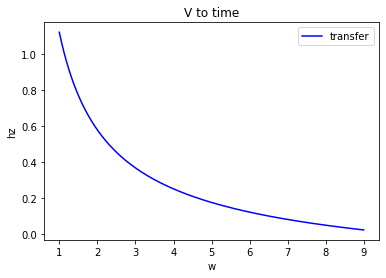

In [125]:
engram = EngramNeuron(1, -19, -20)
Delta = []
for i in range(800):
    w = np.full(n_neuron, i*0.001+0.1)
    InFr = np.full(n_neuron, 10)
    uE = 0.1
    OutFr = engram.LIF(w, InFr, uE)
    delta = lr*OutFr*(InFr-2)*(InFr>2)*(1-w)/w
    Delta.append(delta[0])

plt.plot(range(800), Delta, label = "transfer", color = 'blue')
plt.xlabel('w')
plt.xticks(range(0, 900, 100), range(1, 10))
plt.legend()
plt.ylabel('hz')
#plt.savefig('taskb1.png')
plt.show()

# Massed

In [76]:
T = [0,12*24*7,10,12*24*10]

syn0 = simulation(n_neuron, decay_s, decay_l, lr, decay_da, T, para)

syn0.w_his[-1]

matrix([[0.17048254, 0.17058954, 0.17090156, 0.16483355, 0.16891139,
         0.16830874, 0.17509846, 0.16557487, 0.17579021, 0.17550748]])

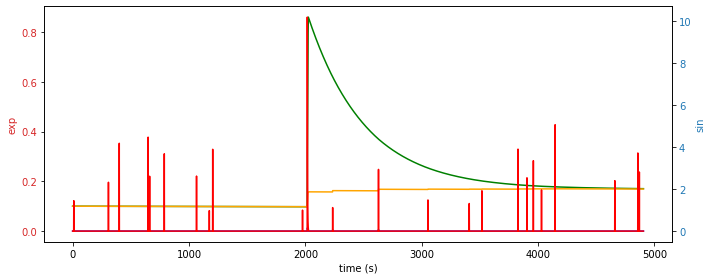

In [77]:
fig, ax1 = plt.subplots()
time = T[0]+T[1]+T[2]+T[3]+1
fig.set_figwidth(10)
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(range(time), syn0.w_his[:, 0], label = "W", color = 'green')
ax1.plot(range(time), syn0.wl_his[:, 0], label = "WL", color = 'orange')
ax1.plot(range(time), syn0.w_con[:, 0], label = "transfer", color = 'blue')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(range(time), syn0.da_his, label = "DA", color = 'red')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('taskb1.png')
plt.show()

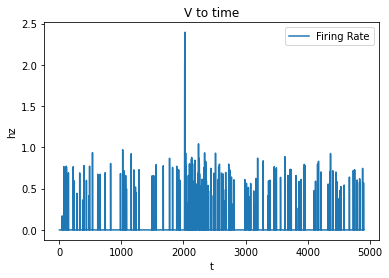

In [78]:
plt.plot(range(time), syn0.out_his, label = "Firing Rate")
plt.xlabel('t')
plt.title("V to time")
plt.legend()
plt.ylabel('hz')
#plt.savefig('taskb1.png')
plt.show()

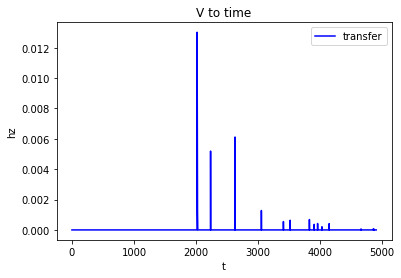

In [79]:
plt.plot(range(time), syn0.w_con[:, 0], label = "transfer", color = 'blue')
plt.xlabel('t')
plt.title("V to time")
plt.legend()
plt.ylabel('hz')
#plt.savefig('taskb1.png')
plt.show()

# Distributed

In [81]:
T = [5,12*24*7,5,12*24*10]
syn1 = simulation(n_neuron, decay_s, decay_l, lr, decay_da, T, para)
syn1.w_his[-1]

matrix([[0.21980919, 0.21733424, 0.21200052, 0.21094478, 0.21484113,
         0.22299527, 0.216052  , 0.21681814, 0.22378471, 0.21578192]])

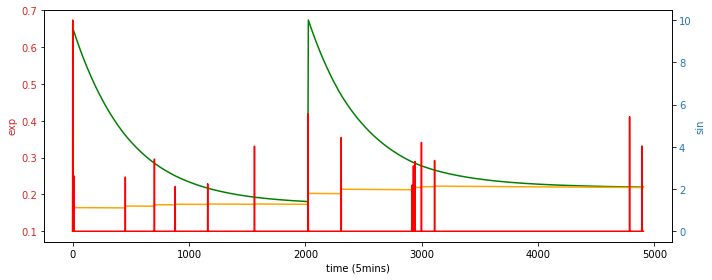

In [82]:
fig, ax1 = plt.subplots()
time = sum(T)+1
fig.set_figwidth(10)
color = 'tab:red'
ax1.set_xlabel('time (5mins)')
ax1.set_ylabel('exp', color=color)
ax1.plot(range(time), syn1.w_his[:, 0], label = "W", color = 'green')
ax1.plot(range(time), syn1.wl_his[:, 0], label = "WL", color = 'orange')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(range(time), syn1.da_his, label = "DA", color = 'red')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('taskb1.png')
plt.show()

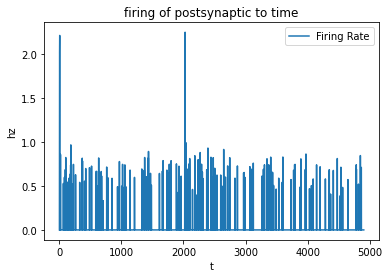

In [83]:
plt.plot(range(time), syn1.out_his, label = "Firing Rate")
plt.xlabel('t')
plt.title("firing of postsynaptic to time")
plt.legend()
plt.ylabel('hz')
#plt.savefig('taskb1.png')
plt.show()

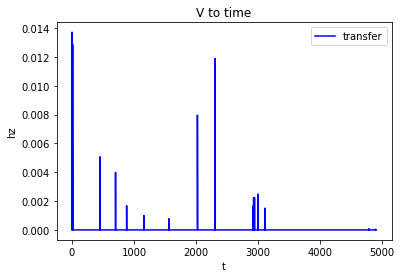

In [84]:
plt.plot(range(time), syn1.w_con[:, 0], label = "transfer", color = 'blue')
plt.xlabel('t')
plt.title("V to time")
plt.legend()
plt.ylabel('hz')
#plt.savefig('taskb1.png')
plt.show()

In [99]:
sum(syn1.w_con[6:6+12*24*7])+sum(syn1.w_con[12*24*7+11:]).mean()

matrix([[0.04706676, 0.04559079, 0.04531642, 0.0453054 , 0.04624269,
         0.04781567, 0.04636684, 0.04477608, 0.04687739, 0.04451572]])

In [100]:
sum(syn0.w_con[12*24*7+11:])

matrix([[0.01604807, 0.01614813, 0.01607677, 0.01568346, 0.01594842,
         0.01571584, 0.01596103, 0.01515512, 0.01611797, 0.015946  ]])

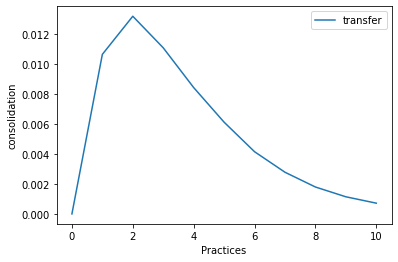

In [109]:
#plt.plot(range(11), syn0.out_his[12*24*7:12*24*7+11], label = "Firing Rate")
plt.plot(range(11), syn0.w_con[12*24*7:12*24*7+11].mean(axis=1), label = "transfer")
plt.xlabel('Practices')
plt.legend()
plt.ylabel('consolidation')
#plt.savefig('taskb1.png')
plt.show()

In [ ]:
plt.plot(range(11), syn0.w_con[12*24*7:12*24*7+11].mean(axis=1), label = "transfer")
plt.xlabel('Practices')
plt.legend()
plt.ylabel('consolidation')
#plt.savefig('taskb1.png')
plt.show()

In [ ]:
plt.plot(range(11), syn1.out_his[:11], label = "Firing Rate")
plt.plot(range(11), syn0.out_his[12*24*7:12*24*7+11], label = "Firing Rate")
plt.xlabel('t')
plt.title("V to time")
plt.legend()
plt.ylabel('hz')
#plt.savefig('taskb1.png')
plt.show()

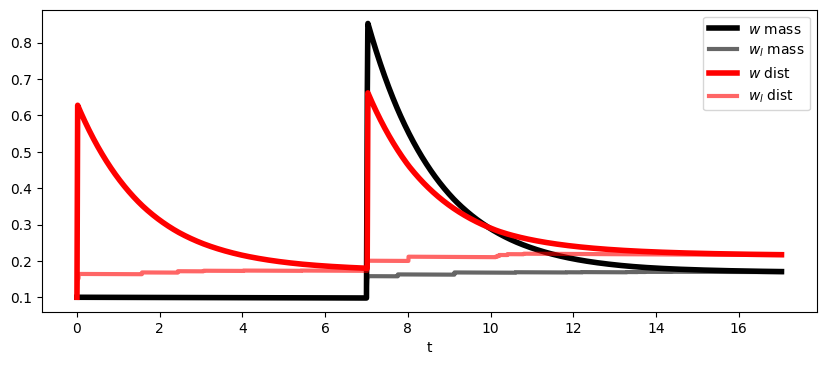

In [96]:
time = sum(T)+1
f = plt.figure()
f.set_figwidth(10)
f.set_dpi(100)
#f.set_figheight(1)
plt.xticks(np.arange(0, 19, 2)*24*12, np.arange(0, 19, 2))
plt.plot(range(time), syn0.w_his.mean(axis=1), label = "$w$ mass", color = 'black', linewidth=4)
plt.plot(range(time), syn0.wl_his.mean(axis=1), label = "$w_l$ mass",color = 'black', linewidth=3, alpha=0.6)
plt.plot(range(time), syn1.w_his.mean(axis=1), label = "$w$ dist", color = 'red', linewidth=4)
plt.plot(range(time), syn1.wl_his.mean(axis=1), label = "$w_l$ dist",color = 'red', linewidth=3, alpha=0.6)
plt.xlabel('t')
plt.legend()
plt.savefig('SpaceEff.png')
plt.show()

In [25]:
T = [8,12*24*7,8,12*24*7,8,12*24*10]
syn2 = simulation(n_neuron, decay_s, decay_l, lr, decay_da, T, para)
syn2.w_his = np.matrix(syn2.w_his)
syn2.wl_his = np.matrix(syn2.wl_his)
syn2.w_his[-1]

matrix([[0.27085039, 0.26745608, 0.26479928, 0.27024781, 0.26073274,
         0.2706452 , 0.26485149, 0.26811035, 0.27660469, 0.26765337]])

ValueError: x and y must have same first dimension, but have shapes (4907,) and (6937, 1)

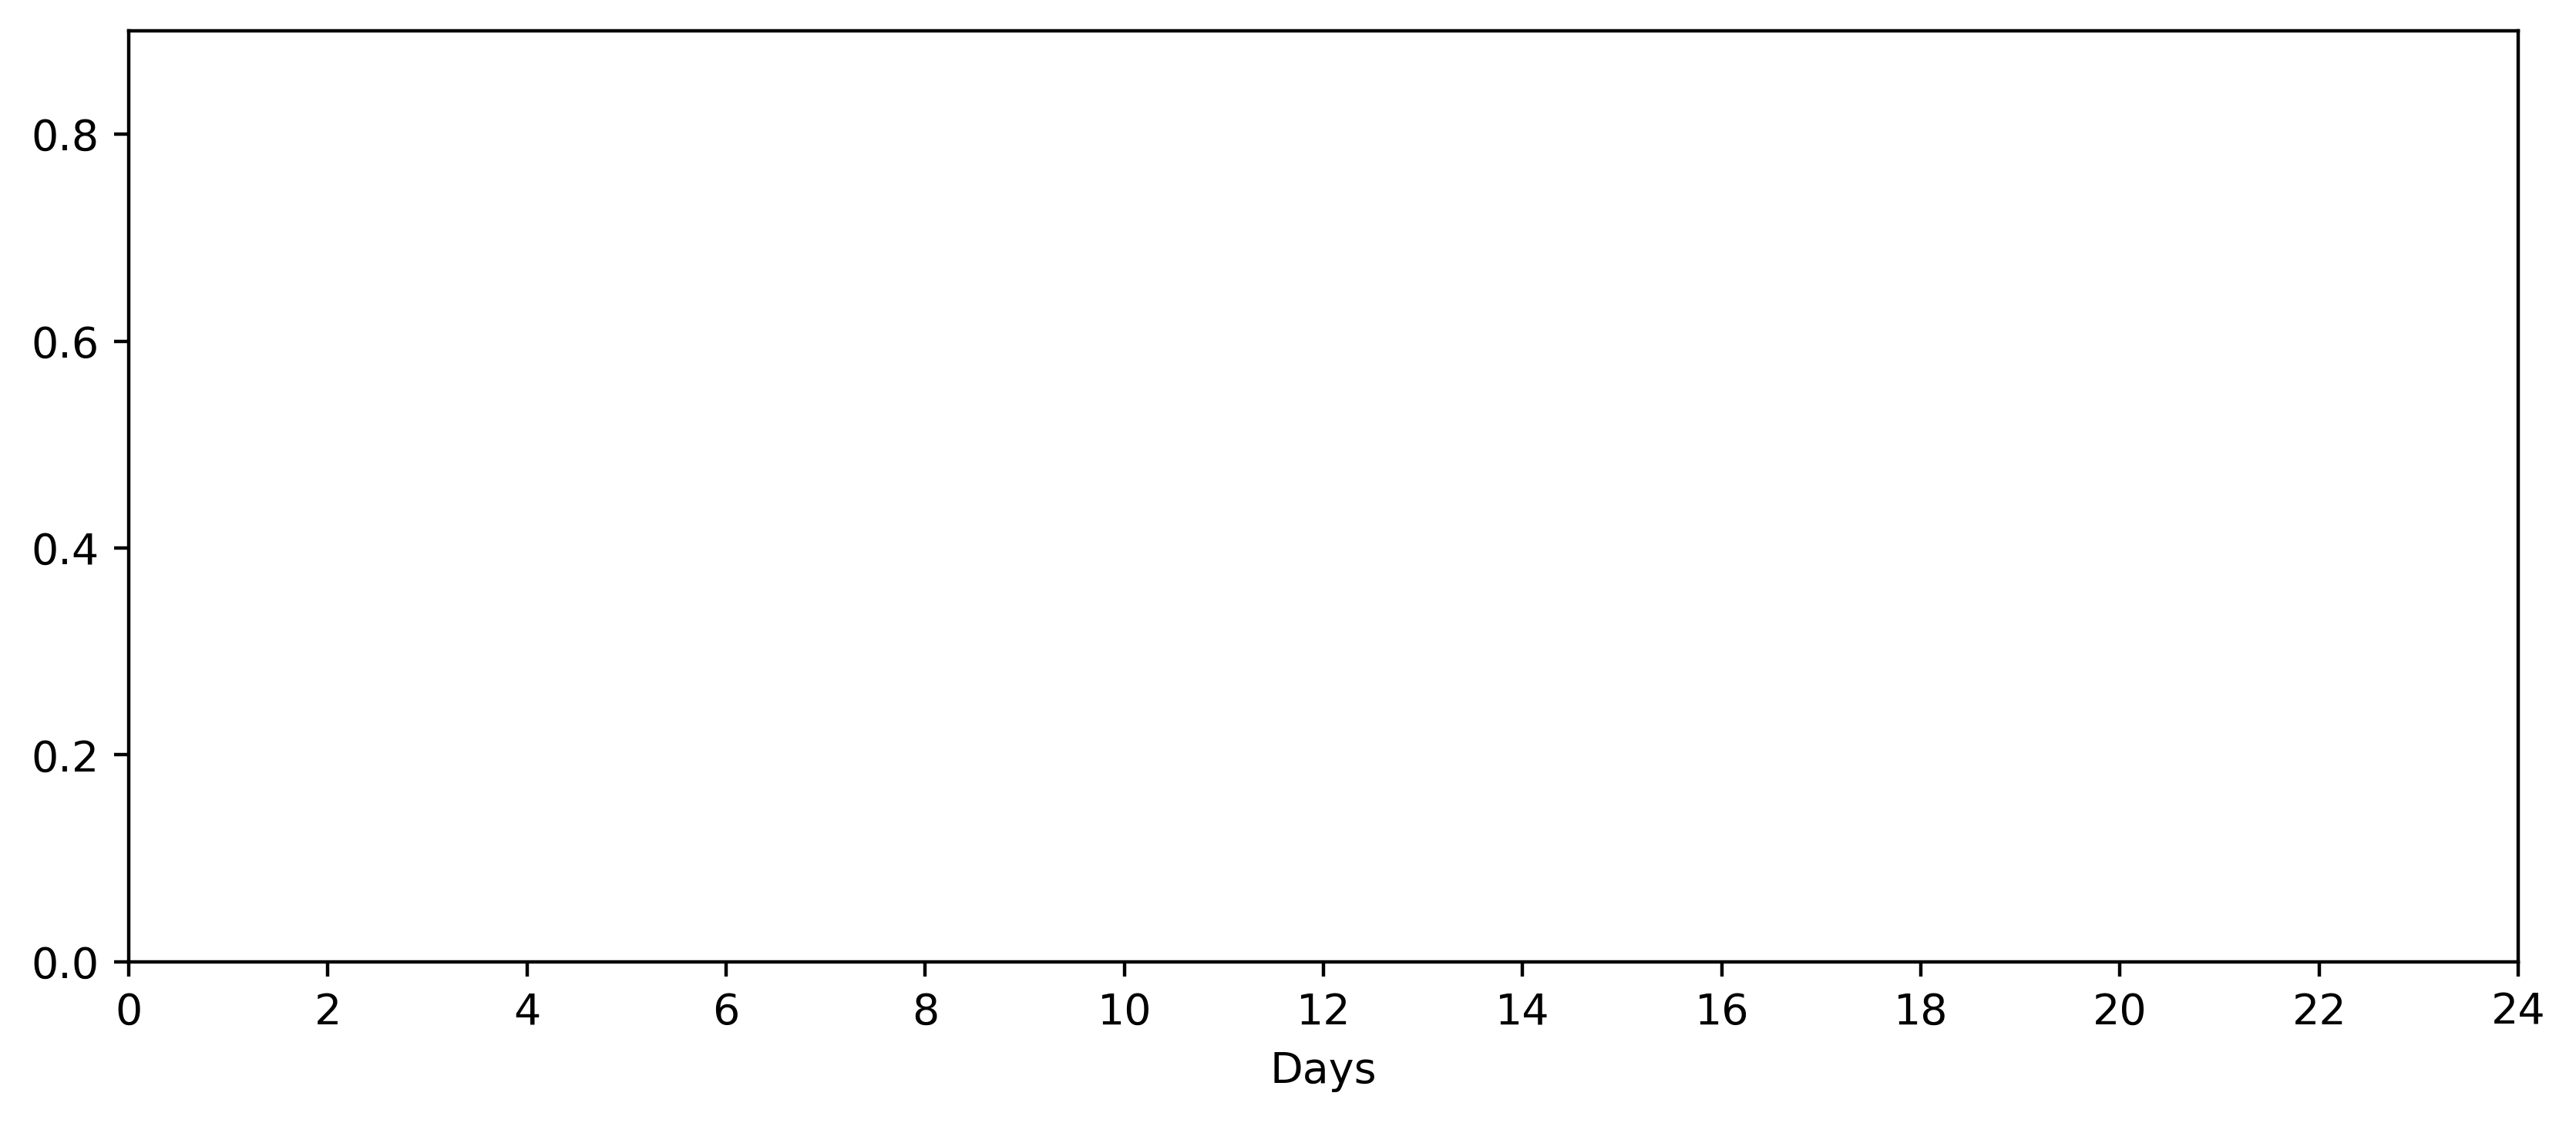

In [98]:
fig, ax1 = plt.subplots()
fig.set_figwidth(10)
fig.set_dpi(400)

time = sum(T)+1
color = 'tab:orange'
ax1.set(ylim=(0, 0.9))
ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8])
ax1.set_xticks(np.arange(0, 26, 2)*24*12, np.arange(0, 26, 2))
ax1.set_xlabel('Days')
#ax1.set_ylabel('w', color=color)
ax1.plot(range(time), syn2.w_his[:, 0], label = "$w$", color = 'orange', linewidth=4)
ax1.plot(range(time), syn2.wl_his[:, 0], label = "$w_l$", color = 'orange', alpha = 0.5, linewidth=3)
ax1.legend()
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set(ylim=(0, 0.08))
ax2.set_yticks([0, 0.01, 0.02])
color = 'tab:red'
ax2.set_ylabel('DA', color=color, y=0.15)  # we already handled the x-label with ax1
ax2.plot(range(time), syn2.w_con, label = "DA", color = 'red')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.savefig('Repeat.png')
plt.show()

In [6]:
W = []
n = 400
intervals = [0, 8, 24, 2*24, 3*24, 4*24, 5*24, 6*24, 7*24, 8*24, 9*24, 11*24, 13*24, 15*24, 17*24, 19*24, 21*24, 23*24, 25*24]
for hours in intervals:
    T = [5,12*hours,5,12*24*10]
    w_ave = 0
    for i in range(n):
        sim = simulation(n_neuron, decay_s, decay_l, lr, decay_da, T, para)
        w_ave += sim.w_his[-1].sum()/n_neuron
    
    print(hours)
    W.append(w_ave/n)   

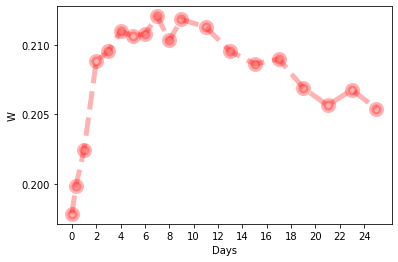

In [16]:
plt.plot(intervals, W, label = "weights", color = 'red', alpha=0.3, linestyle='--', linewidth=5, marker='o', markeredgecolor='r', markersize='10', markeredgewidth=5)
plt.xlabel('Days')
plt.yticks([0.2, 0.205, 0.21])
plt.xticks(np.arange(0, 26, 2)*24, np.arange(0, 26, 2))
#plt.legend()
plt.ylabel('W')
plt.savefig('SpaceEffGap.png')
plt.show()

# Overlearning

[[0.15846959 0.16168258 0.15197597 0.16899958 0.16474237 0.16215088
  0.16458449 0.15695189 0.16287655 0.15415534]]


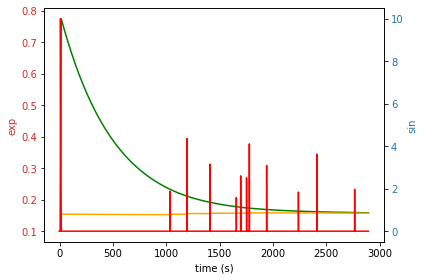

In [177]:
T = [0,8,8,12*24*10]
synOL0 = simulation(n_neuron, decay_s, decay_l, lr, decay_da, T, para)
print(synOL0.w_his[-1])
synOL0.w_his = np.matrix(synOL0.w_his)
synOL0.wl_his = np.matrix(synOL0.wl_his)
fig, ax1 = plt.subplots()
time = sum(T)+1
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(range(time), synOL0.w_his[:, 0], label = "W", color = 'green')
ax1.plot(range(time), synOL0.wl_his[:, 0], label = "WL", color = 'orange')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(range(time), synOL0.da_his, label = "DA", color = 'red')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('taskb1.png')
plt.show()

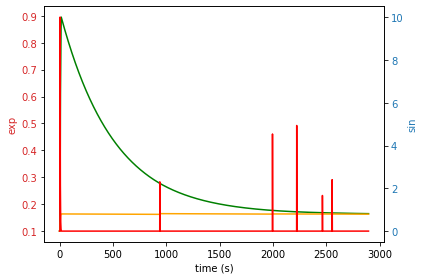

In [128]:
T = [0,4,12,12*24*10]
synOL5 = simulation(n_neuron, decay_s, decay_l, lr, decay_da, T, para)
synOL5.w_his[-1]
synOL5.w_his = np.matrix(synOL5.w_his)
synOL5.wl_his = np.matrix(synOL5.wl_his)
fig, ax1 = plt.subplots()
time = sum(T)+1
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(range(time), synOL5.w_his[:, 0], label = "W", color = 'green')
ax1.plot(range(time), synOL5.wl_his[:, 0], label = "WL", color = 'orange')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(range(time), synOL5.da_his, label = "DA", color = 'red')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('taskb1.png')
plt.show()

[[0.19948775 0.19736755 0.19862848 0.19756474 0.20064254 0.19645139
  0.19510693 0.20569414 0.19802285 0.19663885]]


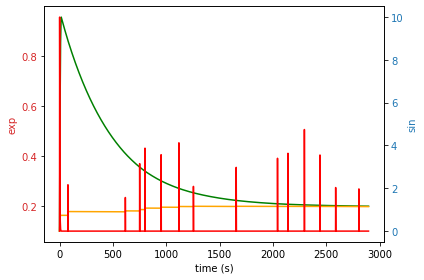

In [180]:
T = [0,0,16,12*24*10]
synOL10 = simulation(n_neuron, decay_s, decay_l, lr, decay_da, T, para)
print(synOL10.w_his[-1])
synOL10.w_his = np.matrix(synOL10.w_his)
synOL10.wl_his = np.matrix(synOL10.wl_his)
fig, ax1 = plt.subplots()
time = sum(T)+1
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(range(time), synOL10.w_his[:, 0], label = "W", color = 'green')
ax1.plot(range(time), synOL10.wl_his[:, 0], label = "WL", color = 'orange')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(range(time), synOL10.da_his, label = "DA", color = 'red')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('taskb1.png')
plt.show()

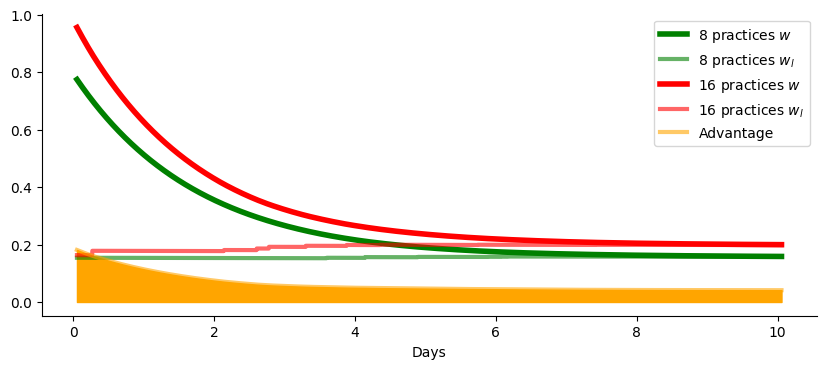

In [181]:
f = plt.figure()
f.set_figwidth(10)
f.set_dpi(100)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
time = sum(T)+1
#f.set_figheight(1)
plt.xticks(np.arange(0, 19, 2)*24*12, np.arange(0, 19, 2))
plt.plot(range(16, time), synOL0.w_his[16:, 0], label = "8 practices $w$", color = 'green', linewidth=4)
plt.plot(range(16, time), synOL0.wl_his[16:, 0], label = "8 practices $w_l$", color = 'green', linewidth=3, alpha=0.6)
#plt.plot(range(time), synOL5.w_his[:, 0], label = "15", color = 'blue', linewidth=4)
#plt.plot(range(time), synOL5.wl_his[:, 0], label = "15L", color = 'blue', linewidth=4)
plt.plot(range(16, time), synOL10.w_his[16:, 0], label = "16 practices $w$", color = 'red', linewidth=4)
plt.plot(range(16, time), synOL10.wl_his[16:, 0], label = "16 practices $w_l$", color = 'red', linewidth=3, alpha=0.6)

plt.plot(range(16,time), synOL10.w_his[16:, 0] - synOL0.w_his[16:, 0], label = "Advantage", color = 'orange', linewidth=3, alpha=0.6)

x = np.arange(16,time)
advantage = np.array(synOL10.w_his[16:, 0] - synOL0.w_his[16:, 0]).squeeze()
plt.fill_between(x, advantage, color = 'orange')


plt.xlabel('Days')
plt.legend()
plt.savefig('OL.png')
plt.show()

In [112]:
W = []
n = 500
for OL in range(10):
    T = [0,12*24*0,8+OL,12*24*10]
    w_ave = 0
    for i in range(n):
        sim = simulation(n_neuron, decay_s, decay_l, lr, decay_da, T, para)
        w_ave += sim.w_his[-1].sum()/n_neuron
        
    W.append(w_ave/n)
    


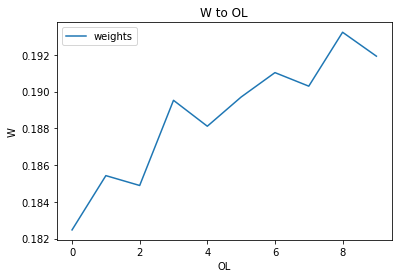

In [113]:
plt.plot(range(10), W, label = "weights")
plt.xlabel('OL')
plt.title("W to OL")
plt.legend()
plt.ylabel('W')
#plt.savefig('taskb1.png')
plt.show()